# Generate Input Data

In [45]:
import numpy as np
import pandas as pd
import random
#Generate 5 random numbers between 10 and 30
np.random.seed(0)
n_samples=1000
n_features = 5
df_XY=pd.DataFrame(data = np.random.normal(0,1, size=(n_samples, n_features)), columns = ['A','B','C','D','E'])
df_XY['Y']=list(np.random.randint(2, size=n_samples))
df_XY['YY']=list(np.random.randint(2, size=n_samples))
df_XY

##############################################################   
df_XY.shape
df_XY.head()
df_XY.to_csv('df_XY.csv',index=False)
##############################################################

In [46]:
df_XY

,A,B,C,D,E,Y,YY
0,1.764052,0.400157,0.978738,2.240893,1.867558,1,1
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599,0,0
2,0.144044,1.454274,0.761038,0.121675,0.443863,0,0
3,0.333674,1.494079,-0.205158,0.313068,-0.854096,1,0
4,-2.552990,0.653619,0.864436,-0.742165,2.269755,0,1
...,...,...,...,...,...,...,...
995,1.711489,-1.820816,0.163495,-0.813117,-0.605355,0,0
996,-1.327524,-0.644172,1.908883,-0.563545,1.082473,1,0
997,-1.951911,2.441216,-0.017285,0.912282,1.239658,1,1
998,-0.573367,0.424889,-0.271260,-0.683568,-1.537438,1,1


# Download CI-VAE, other necessary packages and Load Packages

In [47]:
! rm -rf ci_vae
! rm bb.pt
! rm bb_residuals.pkl
! rm df_reconstructed.csv
! rm df_reconstructed_decoder.csv
! rm residuals.pdf
! rm results_dict.pkl
! rm df_latent.csv

rm: df_reconstructed.csv: No such file or directory
rm: df_reconstructed_decoder.csv: No such file or directory
rm: results_dict.pkl: No such file or directory
rm: df_latent.csv: No such file or directory


In [48]:
! git clone https://github.com/monabiyan/ci_vae.git
! pip install umap-learn

Cloning into 'ci_vae'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 342 (delta 51), reused 72 (delta 26), pack-reused 245
Receiving objects: 100% (342/342), 47.04 MiB | 12.97 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [50]:
import pandas as pd
import numpy as np
import sklearn
import torch
import pickle

In [ ]:
#import umap

In [51]:
import matplotlib.pyplot as plt
from ci_vae import ivae

# Set Necessary Parameters 

In [52]:
model_init=True
model_tobe_trained=True
save_address="bb"

kl_coef = 0.0001
reconst_coef = 1
classifier_coef = 0.1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



# Initialize the Model

In [53]:
obj1 = ivae.IVAE(df_XY = df_XY,
               latent_size = 2,
               reconst_coef = reconst_coef,
               kl_coef = kl_coef,
               classifier_coef = classifier_coef,
               test_ratio = 1)

if model_init:
    obj1.model_initialiaze()

## See The Model Architecture

In [54]:
print(obj1.model)

IVAE_ARCH(
  (encoder): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (3): Dropout(p=0.05, inplace=False)
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (7): Dropout(p=0.05, inplace=False)
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (11): Dropout(p=0.05, inplace=False)
    (12): Linear(in_features=20, out_features=20, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=True, track_running_stats=True)
    (15): Dropout(p=0.05, inplace=False)
    (16): Linear(in_features=20, out_features=20, bias=True)
    (17): ReLU()
    (18): BatchNorm1d(20, eps=1e-05, momentum=0.2, affine=Tru

## See the Initialized Weights

In [55]:
for param in obj1.model.parameters():
    print(param)

Parameter containing:
tensor([[-0.3705,  0.3857, -0.4075, -0.3477, -0.1122],
        [ 0.0116,  0.1458,  0.2306,  0.1746,  0.0396],
        [-0.3684, -0.2223, -0.3874,  0.0677, -0.4012],
        [-0.4246, -0.1803,  0.4357, -0.2509, -0.1471],
        [ 0.1191,  0.3276,  0.1864, -0.1505, -0.2528],
        [ 0.2511, -0.1379, -0.2943, -0.3918, -0.3833],
        [-0.2161, -0.0104,  0.0505, -0.0464,  0.1213],
        [-0.3540,  0.3867,  0.2555,  0.2738, -0.0977],
        [-0.0137, -0.4333, -0.3514,  0.3561, -0.3726],
        [-0.0164,  0.1294, -0.1486,  0.1473, -0.3219],
        [-0.3165, -0.1437,  0.1838,  0.1121, -0.1302],
        [ 0.1091,  0.3137,  0.0752,  0.0405, -0.0046],
        [-0.2327,  0.2542,  0.1799, -0.0693, -0.4041],
        [-0.3619,  0.1179, -0.1499, -0.2375,  0.4424],
        [ 0.2961,  0.3525,  0.1787, -0.3419,  0.3879],
        [-0.2072, -0.1116, -0.2210,  0.4233,  0.1351],
        [-0.3249,  0.0267, -0.1358, -0.0746, -0.3844],
        [ 0.1215,  0.1960, -0.0934, -0.3566

# RUN for Training

In [56]:
##########
if model_tobe_trained:
    lr=1e-2
    print(lr)
    obj1.model_training(epochs=100,learning_rate=lr)

    lr=1e-3
    print(lr)
    #obj.model_training(epochs=70,learning_rate=lr)

    lr=1e-3
    print(lr)
    #obj.model_training(epochs=200,learning_rate=lr)

    obj1.model_save(address=save_address+".pt")
    obj1.save_residuals(address=save_address+'_residuals.pkl')
    lr=1e-3
    print(lr)
    #obj.model_training(epochs=70,learning_rate=lr)

    lr=5e-4
    print(lr)
    obj1.model_training(epochs=50,learning_rate=lr)

    obj1.model_save(address=save_address+".pt")
    obj1.save_residuals(address=save_address+'_residuals.pkl')

    lr=1e-5
    print(lr)
    obj1.model_training(epochs=50,learning_rate=lr)

    lr=5e-6
    print(lr)
    obj1.model_training(epochs=50,learning_rate=lr)


0.01
====> Epoch: 1 total_train_loss: 0.994227 Total_test_loss: 0.866531 Total_BCE_test_loss: 0.792369 Total_KLD_test_loss: 0.000014 Total_CEP_test_loss: 0.074149


/Users/mohsennabian/Desktop/ci_vae/example/ci_vae/ivae.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(torch.reshape(y, (-1,)), dtype=torch.long)
/Users/mohsennabian/Desktop/ci_vae/example/ci_vae/ivae.py:406: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(torch.reshape(y, (-1,)), dtype=torch.long)


====> Epoch: 2 total_train_loss: 0.926638 Total_test_loss: 0.868061 Total_BCE_test_loss: 0.791174 Total_KLD_test_loss: 0.000017 Total_CEP_test_loss: 0.076870
====> Epoch: 3 total_train_loss: 0.915217 Total_test_loss: 0.864692 Total_BCE_test_loss: 0.790345 Total_KLD_test_loss: 0.000024 Total_CEP_test_loss: 0.074322
====> Epoch: 4 total_train_loss: 0.907264 Total_test_loss: 0.864478 Total_BCE_test_loss: 0.789280 Total_KLD_test_loss: 0.000033 Total_CEP_test_loss: 0.075165
====> Epoch: 5 total_train_loss: 0.899467 Total_test_loss: 0.863340 Total_BCE_test_loss: 0.788002 Total_KLD_test_loss: 0.000039 Total_CEP_test_loss: 0.075298
====> Epoch: 6 total_train_loss: 0.888876 Total_test_loss: 0.861153 Total_BCE_test_loss: 0.789088 Total_KLD_test_loss: 0.000039 Total_CEP_test_loss: 0.072025
====> Epoch: 7 total_train_loss: 0.889662 Total_test_loss: 0.857791 Total_BCE_test_loss: 0.786180 Total_KLD_test_loss: 0.000040 Total_CEP_test_loss: 0.071571
====> Epoch: 8 total_train_loss: 0.883999 Total_test

====> Epoch: 56 total_train_loss: 0.721416 Total_test_loss: 0.693855 Total_BCE_test_loss: 0.622525 Total_KLD_test_loss: 0.002020 Total_CEP_test_loss: 0.069310
====> Epoch: 57 total_train_loss: 0.719241 Total_test_loss: 0.696746 Total_BCE_test_loss: 0.625439 Total_KLD_test_loss: 0.002023 Total_CEP_test_loss: 0.069284
====> Epoch: 58 total_train_loss: 0.722025 Total_test_loss: 0.698657 Total_BCE_test_loss: 0.627358 Total_KLD_test_loss: 0.002019 Total_CEP_test_loss: 0.069281
====> Epoch: 59 total_train_loss: 0.721232 Total_test_loss: 0.693336 Total_BCE_test_loss: 0.622036 Total_KLD_test_loss: 0.002004 Total_CEP_test_loss: 0.069295
====> Epoch: 60 total_train_loss: 0.717197 Total_test_loss: 0.689740 Total_BCE_test_loss: 0.618399 Total_KLD_test_loss: 0.002019 Total_CEP_test_loss: 0.069323
====> Epoch: 61 total_train_loss: 0.716028 Total_test_loss: 0.688614 Total_BCE_test_loss: 0.617202 Total_KLD_test_loss: 0.002056 Total_CEP_test_loss: 0.069355
====> Epoch: 62 total_train_loss: 0.718843 Tot

====> Epoch: 9 total_train_loss: 0.686154 Total_test_loss: 0.649830 Total_BCE_test_loss: 0.577866 Total_KLD_test_loss: 0.002694 Total_CEP_test_loss: 0.069270
====> Epoch: 10 total_train_loss: 0.689208 Total_test_loss: 0.649607 Total_BCE_test_loss: 0.577671 Total_KLD_test_loss: 0.002688 Total_CEP_test_loss: 0.069247
====> Epoch: 11 total_train_loss: 0.683025 Total_test_loss: 0.649222 Total_BCE_test_loss: 0.577269 Total_KLD_test_loss: 0.002688 Total_CEP_test_loss: 0.069265
====> Epoch: 12 total_train_loss: 0.685996 Total_test_loss: 0.648761 Total_BCE_test_loss: 0.576805 Total_KLD_test_loss: 0.002686 Total_CEP_test_loss: 0.069270
====> Epoch: 13 total_train_loss: 0.684946 Total_test_loss: 0.650069 Total_BCE_test_loss: 0.578139 Total_KLD_test_loss: 0.002655 Total_CEP_test_loss: 0.069275
====> Epoch: 14 total_train_loss: 0.685873 Total_test_loss: 0.649091 Total_BCE_test_loss: 0.577118 Total_KLD_test_loss: 0.002692 Total_CEP_test_loss: 0.069281
====> Epoch: 15 total_train_loss: 0.686077 Tota

====> Epoch: 11 total_train_loss: 0.679685 Total_test_loss: 0.646338 Total_BCE_test_loss: 0.574391 Total_KLD_test_loss: 0.002724 Total_CEP_test_loss: 0.069224
====> Epoch: 12 total_train_loss: 0.679877 Total_test_loss: 0.646190 Total_BCE_test_loss: 0.574240 Total_KLD_test_loss: 0.002733 Total_CEP_test_loss: 0.069216
====> Epoch: 13 total_train_loss: 0.679755 Total_test_loss: 0.646158 Total_BCE_test_loss: 0.574226 Total_KLD_test_loss: 0.002709 Total_CEP_test_loss: 0.069222
====> Epoch: 14 total_train_loss: 0.679231 Total_test_loss: 0.645930 Total_BCE_test_loss: 0.573948 Total_KLD_test_loss: 0.002751 Total_CEP_test_loss: 0.069231
====> Epoch: 15 total_train_loss: 0.682250 Total_test_loss: 0.645211 Total_BCE_test_loss: 0.573228 Total_KLD_test_loss: 0.002769 Total_CEP_test_loss: 0.069214
====> Epoch: 16 total_train_loss: 0.681670 Total_test_loss: 0.645780 Total_BCE_test_loss: 0.573845 Total_KLD_test_loss: 0.002709 Total_CEP_test_loss: 0.069226
====> Epoch: 17 total_train_loss: 0.680383 Tot

====> Epoch: 16 total_train_loss: 0.677776 Total_test_loss: 0.645015 Total_BCE_test_loss: 0.573066 Total_KLD_test_loss: 0.002720 Total_CEP_test_loss: 0.069229
====> Epoch: 17 total_train_loss: 0.680756 Total_test_loss: 0.645369 Total_BCE_test_loss: 0.573447 Total_KLD_test_loss: 0.002698 Total_CEP_test_loss: 0.069224
====> Epoch: 18 total_train_loss: 0.684383 Total_test_loss: 0.646530 Total_BCE_test_loss: 0.574573 Total_KLD_test_loss: 0.002729 Total_CEP_test_loss: 0.069228
====> Epoch: 19 total_train_loss: 0.678752 Total_test_loss: 0.645574 Total_BCE_test_loss: 0.573650 Total_KLD_test_loss: 0.002710 Total_CEP_test_loss: 0.069214
====> Epoch: 20 total_train_loss: 0.680025 Total_test_loss: 0.646183 Total_BCE_test_loss: 0.574263 Total_KLD_test_loss: 0.002699 Total_CEP_test_loss: 0.069221
====> Epoch: 21 total_train_loss: 0.677489 Total_test_loss: 0.646023 Total_BCE_test_loss: 0.574127 Total_KLD_test_loss: 0.002672 Total_CEP_test_loss: 0.069224
====> Epoch: 22 total_train_loss: 0.675701 Tot

# Save The Trained Model

In [57]:
##########
print("running the neural network")
#run(obj1,save_address)
obj1.model_save(address=save_address+".pt")
obj1.save_residuals(address=save_address+'_residuals.pkl')

running the neural network
model saved


# Visualize Residuals

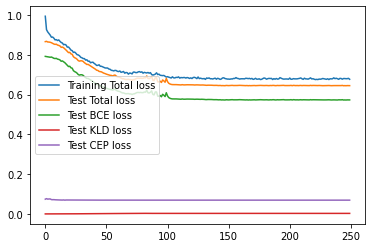

<Figure size 432x288 with 0 Axes>

In [58]:
obj1.plot_residuals(init_index=0)

# Load Model and Data

In [59]:
from ci_vae import ivae
import pandas as pd
import numpy as np
import sklearn
import torch
#import umap
import pickle
import matplotlib.pyplot as plt

In [60]:
print("start of the code")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##############################################################   
##############################################################
model_init=True
model_tobe_trained=False

model_init=True
model_file_address='./bb.pt'
save_address1="./"

df_XY=pd.read_csv('df_XY.csv')

start of the code


## Load Saved Model

In [66]:
obj2 = ivae.IVAE(df_XY = df_XY,
               reconst_coef = reconst_coef,
               latent_size = 8,
               kl_coef = kl_coef,
               classifier_coef = classifier_coef,
               test_ratio = 1)

#obj2.model_initialiaze()

obj2.model_load(address="bb.pt")

model loaded


()

In [64]:
obj2 = ivae.IVAE(df_XY = df_XY,
               reconst_coef = reconst_coef,
               latent_size = 8,
               kl_coef = kl_coef,
               classifier_coef = classifier_coef,
               test_ratio = 1)

In [68]:
obj2.model_initialiaze()

In [70]:
checkpoint = torch.load("bb.pt")
print(checkpoint)

{'model_state_dict': OrderedDict([('encoder.0.weight', tensor([[-0.4260,  0.2921, -0.3112, -0.4643, -0.1166],
        [ 0.1508,  0.1378,  0.2629,  0.1698, -0.0614],
        [-0.4906, -0.0717, -0.5092,  0.0494, -0.1458],
        [-0.5151, -0.0515,  0.2733, -0.1903, -0.1448],
        [ 0.1573,  0.2526,  0.1219, -0.2918, -0.2072],
        [ 0.3287, -0.1702, -0.2257, -0.2881, -0.4348],
        [-0.2109, -0.0610,  0.1442, -0.1299,  0.0167],
        [-0.2641,  0.3978,  0.2882,  0.3043, -0.1493],
        [-0.0470, -0.3142, -0.4191,  0.5227, -0.2984],
        [-0.0634,  0.0857, -0.1622,  0.4709, -0.1246],
        [-0.1485, -0.1408,  0.3244,  0.0928, -0.1727],
        [ 0.1613,  0.1396,  0.2759, -0.0078, -0.0734],
        [-0.2567,  0.2090,  0.1259, -0.1759, -0.4480],
        [-0.2810,  0.1279, -0.3274, -0.3508,  0.3497],
        [ 0.3981,  0.2735,  0.3203, -0.4719,  0.1764],
        [-0.1621,  0.0028, -0.1599,  0.7057,  0.0265],
        [-0.4342, -0.0470, -0.0294, -0.1198, -0.4607],
        [ 

In [72]:
checkpoint["model_state_dict"]

OrderedDict([('encoder.0.weight',
              tensor([[-0.4260,  0.2921, -0.3112, -0.4643, -0.1166],
                      [ 0.1508,  0.1378,  0.2629,  0.1698, -0.0614],
                      [-0.4906, -0.0717, -0.5092,  0.0494, -0.1458],
                      [-0.5151, -0.0515,  0.2733, -0.1903, -0.1448],
                      [ 0.1573,  0.2526,  0.1219, -0.2918, -0.2072],
                      [ 0.3287, -0.1702, -0.2257, -0.2881, -0.4348],
                      [-0.2109, -0.0610,  0.1442, -0.1299,  0.0167],
                      [-0.2641,  0.3978,  0.2882,  0.3043, -0.1493],
                      [-0.0470, -0.3142, -0.4191,  0.5227, -0.2984],
                      [-0.0634,  0.0857, -0.1622,  0.4709, -0.1246],
                      [-0.1485, -0.1408,  0.3244,  0.0928, -0.1727],
                      [ 0.1613,  0.1396,  0.2759, -0.0078, -0.0734],
                      [-0.2567,  0.2090,  0.1259, -0.1759, -0.4480],
                      [-0.2810,  0.1279, -0.3274, -0.3508,  0.3497],


In [71]:
obj2.model=obj2.model.load_state_dict(checkpoint["model_state_dict"])

RuntimeError: Error(s) in loading state_dict for IVAE_ARCH:
	size mismatch for encoder.36.weight: copying a param with shape torch.Size([4, 10]) from checkpoint, the shape in current model is torch.Size([16, 10]).
	size mismatch for encoder.36.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for decoder.0.weight: copying a param with shape torch.Size([10, 2]) from checkpoint, the shape in current model is torch.Size([10, 8]).
	size mismatch for classifier.0.weight: copying a param with shape torch.Size([2, 2]) from checkpoint, the shape in current model is torch.Size([2, 8]).

## Print the Weights

In [67]:
for param in obj2.model.parameters():
    print(param)

AttributeError: 'dict' object has no attribute 'parameters'

# Make Prediction of All Test Data

In [63]:
with torch.no_grad():
    obj2.model.eval()

    obj2.load_residuals(address='bb_residuals.pkl')
    print("model loaded")
    
    obj2.generate_test_results()
    print("test data generated")

AttributeError: 'dict' object has no attribute 'eval'

# Comprehensive Checking of The Prediction Values vs. True Values. 

In [23]:
print(obj2.x_last)

AttributeError: 'IVAE' object has no attribute 'x_last'

In [ ]:
print(obj2.x_pred)

In [ ]:
(np.abs(obj2.x_pred - obj2.x_last)).mean()

In [ ]:
(obj2.x_pred-obj2.x_last)

In [ ]:
print(obj2.y_last)

In [ ]:
print(obj2.y_pred)

In [ ]:
df_XY

In [ ]:
with torch.no_grad():
    obj2.model.eval()
    for x, y in obj2.testloader:
      x = x.to(device)
      print(x.size())
      print(x)
      # forward
      x_hat,y_hat, mu, logvar,z = obj2.model(x)
    
    df_reconstructed = pd.DataFrame(x_hat.cpu().detach().numpy(), columns=obj2.df_XY.drop(columns=['Y']).columns)
    print(df_reconstructed.shape)
    df_latent=pd.DataFrame(z.cpu().detach().numpy())
    
    obj2.model.eval()
    
    df_reconstructed_decoder=pd.DataFrame(obj2.model.decoder(z).cpu().detach().numpy(), columns=obj2.df_XY.drop(columns=['Y']).columns)

    df_reconstructed.to_csv('df_reconstructed.csv')
    df_latent.to_csv('df_latent.csv')
    df_reconstructed_decoder.to_csv('df_reconstructed_decoder.csv')
    print("Full_data_reconstructed...")
    
    print("========df_reconstructed========")
    print(df_reconstructed)
    print("========df_reconstructed_decoder========")
    print(df_reconstructed_decoder)
    print("========df_Original========")
    print(df_XY)
    
    
    


# Checking Linear Separability of Data on Lower Dimensioanl Space

In [ ]:
print("regression analysis")
obj2.regression_analysis(obj2.zs,df_XY['Y'])

# Visualize Data on Lower Dimensional Space

In [ ]:
print("calculate tsne_umap_pca")
tsne_mat,umap_mat,pca_mat,Y=obj2.calculate_lower_dimensions(obj2.zs,obj2.y_last,N=100)
obj2.plot_lower_dimension(tsne_mat,Y,projection='3d',save_str='tsne3d.pdf')
obj2.plot_lower_dimension(tsne_mat,Y,projection='2d',save_str='tsne2d.pdf')
obj2.plot_lower_dimension(umap_mat,Y,projection='3d',save_str='umap3d.pdf')
obj2.plot_lower_dimension(umap_mat,Y,projection='2d',save_str='umap2d.pdf')
obj2.plot_lower_dimension(pca_mat,Y,projection='3d',save_str='pca3d.pdf')
obj2.plot_lower_dimension(pca_mat,Y,projection='2d',save_str='pca2d.pdf')

print("finished")


# Perform Interpolation across all groups (Y) and all features from YY=0 to YY=1

In [ ]:
ff = obj2.traversal_all_groups(traversal_step=5)

# See the interpolation results

In [ ]:
with open('results_dict.pkl', 'rb') as f:
    ff = pickle.load(f)

In [ ]:
ff['med']['0']

In [ ]:
ff['mean']['1']

In [ ]:
plt.plot(ff['med']['1']['B'])

In [ ]:
plt.plot(ff['mean']['1']['B'])

In [ ]:
plt.plot(ff['med']['0']['C'])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ff['mean']['0']['C'])

# Generate Synthetic Data for a Given Class

In [ ]:
bb = obj2.synthetic_single_group(group_id=0,nr_of_synthetic=1000)

In [ ]:
bb.shape

In [ ]:
bb